# Data understanding

To start, we are going to explore the data received and start transforming the raw data to a more cleaned and organized data.

Lets start by importing and reading the raw data given.

In [1]:
import pandas as pd

file_path = './data/dataset.csv'
df = pd.read_csv(file_path)
df.head()

Date_published                                           Headline  \
0     2022-06-21  Banks holding on to subsidy share, say payment...   
1     2022-04-19  Digitally ready Bank of Baroda aims to click o...   
2     2022-05-27  Karnataka attracted investment commitment of R...   
3     2022-04-06  Splitting of provident fund accounts may be de...   
4     2022-06-14  Irdai weighs proposal to privatise Insurance I...   

                                            Synopsis  \
0  The companies have written to the National Pay...   
1  At present, 50% of the bank's retail loans are...   
2  Karnataka is at the forefront in attracting in...   
3  The EPFO is likely to split accounts only at t...   
4  Set up in 2009 as an advisory body, IIB collec...   

                                           Full_text Final Status  
0  ReutersPayments companies and banks are at log...     Negative  
1  AgenciesThe bank presently has 20 million acti...     Positive  
2  PTIKarnataka Chief Minister Basavaraj Bommai.K...     Positive  
3  Getty ImagesThe budget for FY22 had imposed in...     Negative  
4  AgenciesThere is a view in the insurance indus...     Positive

### Dataset information

In [2]:
num_rows, num_cols = df.shape
column_names = df.columns.to_list()

data_types = df.dtypes

# Display the information
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)
print("\nData types of columns:")
print(data_types)

Number of rows: 400
Number of columns: 5
Column names: ['Date_published', 'Headline', 'Synopsis', 'Full_text', 'Final Status']

Data types of columns:
Date_published    object
Headline          object
Synopsis          object
Full_text         object
Final Status      object
dtype: object


Lets analyse the category type of each column in the dataset.

In [3]:
# Initialize empty dictionaries to store column categories
categorical_cols = {}
continuous_cols = {}
discrete_cols = {}

# Iterate over each column and categorize based on data type and unique value count
for column in df.columns:
    unique_count = df[column].nunique()
    if data_types[column] == 'object' or unique_count <= 10:
        categorical_cols[column] = unique_count
    elif data_types[column] in ['int64', 'float64']:
        if unique_count <= 10:
            discrete_cols[column] = unique_count
        else:
            continuous_cols[column] = unique_count

# Display categorized columns
print(f"Categorical columns: {categorical_cols}")
print(f"Continuous columns: {continuous_cols}")
print(f"Discrete columns: {discrete_cols}")

Categorical columns: {'Date_published': 75, 'Headline': 368, 'Synopsis': 398, 'Full_text': 400, 'Final Status': 3}
Continuous columns: {}
Discrete columns: {}


### Missing values

Lets check if there are any missing values in the dataset.

In [4]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          1
Full_text         0
Final Status      0
dtype: int64
Total records     400


As we can see, there is a mmissing value in a record that has no synopsis. Lets chec the record and deal with this.

In [5]:
# print missing value
df[df.isnull().any(axis=1)]

Date_published                                           Headline Synopsis  \
56     2022-04-08  RBI keeps repo rate unchanged; reduces growth ...      NaN   

                                            Full_text Final Status  
56  ANIStory outlineThe benchmark repo rate stands...     Negative

Substitue the missing value of the records with a NaN synopsis by an empty string.

In [6]:
df['Synopsis'][56] = ""

Check if the missing value is still present in record of index 56.

In [7]:
# print missing value
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date_published, Headline, Synopsis, Full_text, Final Status]
Index: []

As we can see, there are no more missing values in the dataset.

In [8]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          0
Full_text         0
Final Status      0
dtype: int64
Total records     400


### Unique values

Now, we are going to analyse the number of unique values in each column.

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}' ({len(unique_values)} results found):")
    print(unique_values)
    print()

Unique values in column 'Date_published' (75 results found):
['2022-06-21' '2022-04-19' '2022-05-27' '2022-04-06' '2022-06-14'
 '2022-05-13' '2022-05-25' '2022-04-27' '2022-06-13' '2022-05-07'
 '2022-06-20' '2022-05-31' '2022-06-09' '2022-06-08' '2022-04-18'
 '2022-06-17' '2022-04-12' '2022-06-29' '2022-04-09' '2022-06-11'
 '2022-06-05' '2022-04-04' '2022-06-06' '2022-05-21' '2022-05-19'
 '2022-05-24' '2022-06-02' '2022-05-10' '2022-06-07' '2022-05-30'
 '2022-05-16' '2022-06-18' '2022-05-14' '2022-06-16' '2022-06-23'
 '2022-04-24' '2022-04-11' '2022-06-28' '2022-04-13' '2022-04-21'
 '2022-04-08' '2022-04-07' '2022-05-11' '2022-04-23' '2022-04-25'
 '2022-04-01' '2022-06-25' '2022-04-29' '2022-06-01' '2022-05-02'
 '2022-04-20' '2022-05-12' '2022-05-17' '2022-06-26' '2022-06-03'
 '2022-06-22' '2022-05-05' '2022-05-09' '2022-05-04' '2022-05-26'
 '2022-04-17' '2022-05-18' '2022-06-24' '2022-06-30' '2022-06-10'
 '2022-04-26' '2022-06-27' '2022-04-05' '2022-05-06' '2022-06-15'
 '2022-04-22' '

By analysing the unique values in each column, we can get to some conclusions:

1. In the **'Date_published'** column we can see that the news on this dataset goes from the day '01-04-2022' to the day '30-06-2022' (3 full months of data news).
2. In the **'Headline'** column, there are some news that have the same headline (check if they are duplicates or the synopysys or full-text differ between them).
3. In the **'Synopsis'** and **'Full_text'** columns it's noticible the presence of special characters.
4. The **'Final Score'** column has a low and finite number of possible solutions. This means that this column can be transformed to an integer range of values. But first we need to handle the only record with a mispealed _Final\_Status_ value ('Positive ').

Now, lets see if the dataset is balanced.

In [10]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print()
print(final_status_proportion)

Positive     215
Negative     184
Positive       1
Name: Final Status, dtype: int64

Positive     0.5375
Negative     0.4600
Positive     0.0025
Name: Final Status, dtype: float64


As we can see here, the code is separating one of the positive records from the other positive records. This is because the single positive record has an extra space in the end and the other don't. So, we have to deal with this by removing all the unnecessary characters.

In [11]:
import re
import unidecode

# Remove accents and punctuation
for column in ['Headline', 'Synopsis', 'Full_text']:
    df[column] = df[column].apply(lambda record: unidecode.unidecode(record))   # Remove accents
    df[column].apply(lambda record: re.sub('[^a-zA-Z0-9]', ' ', record))        # Remove punctuation without removing numbers

df['Final Status'] = df['Final Status'].str.strip()   # Trimming Spaces
df['Final Status'] = df['Final Status'].str.lower()   # Case Normalization    

lets check the dataset.

In [12]:
df.head()

Date_published                                           Headline  \
0     2022-06-21  Banks holding on to subsidy share, say payment...   
1     2022-04-19  Digitally ready Bank of Baroda aims to click o...   
2     2022-05-27  Karnataka attracted investment commitment of R...   
3     2022-04-06  Splitting of provident fund accounts may be de...   
4     2022-06-14  Irdai weighs proposal to privatise Insurance I...   

                                            Synopsis  \
0  The companies have written to the National Pay...   
1  At present, 50% of the bank's retail loans are...   
2  Karnataka is at the forefront in attracting in...   
3  The EPFO is likely to split accounts only at t...   
4  Set up in 2009 as an advisory body, IIB collec...   

                                           Full_text Final Status  
0  ReutersPayments companies and banks are at log...     negative  
1  AgenciesThe bank presently has 20 million acti...     positive  
2  PTIKarnataka Chief Minister Basavaraj Bommai.K...     positive  
3  Getty ImagesThe budget for FY22 had imposed in...     negative  
4  AgenciesThere is a view in the insurance indus...     positive

Lets check if now there are only two possible values for the _Final\_Status_ column (_Positive_ and _Negative_).

In [13]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print()
print(final_status_proportion)

positive    216
negative    184
Name: Final Status, dtype: int64

positive    0.54
negative    0.46
Name: Final Status, dtype: float64


In [14]:
import plotly.express as px

status_counts = df['Final Status'].value_counts()
status_counts_df = pd.DataFrame(status_counts).reset_index()

fig = px.pie(status_counts_df, values='Final Status', names='index', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As we can see, the dataset is almost balanced. This slight imbalance will probably not affect significantly the model's performance.

### Exploratory analysis

Firstly, as the dataset consists of news of 3 full months, lets start by exploring the publication data of each news article, in order to identify trends or patterns in publication frequency over time, and to explore how sentiments vary accross the different time periods.

In [15]:
import matplotlib.pyplot as plt

df['Date_published'] = pd.to_datetime(df['Date_published'])    # Convert from string to datetime format

daily_counts = df.groupby(df['Date_published'].dt.date).size()
monthly_counts = df.groupby(df['Date_published'].dt.to_period('M')).size()

Plotting the news by days.

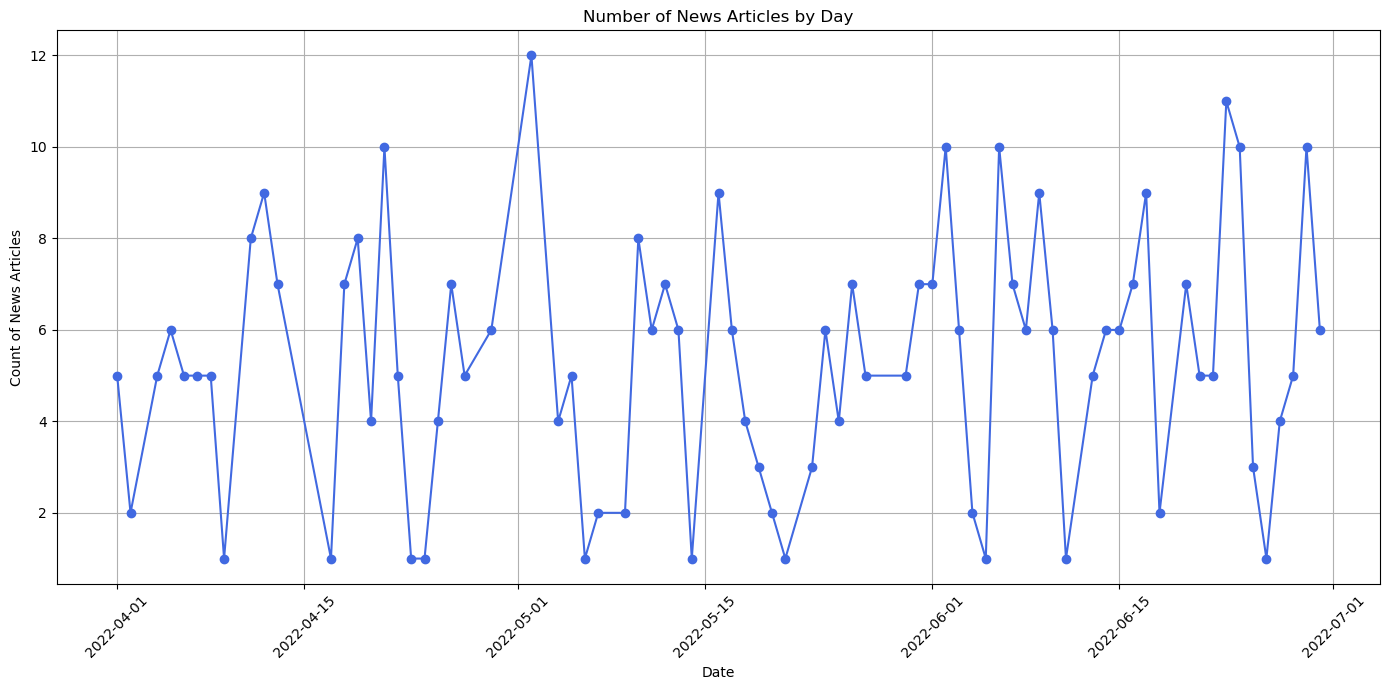

In [16]:
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', marker='o', color='royalblue')
plt.title('Number of News Articles by Day')
plt.xlabel('Date')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

- In this graph (number of news per day), we can see that the number of publications per day ranges between 1 and 12 articles published.
- We also can conclude that the news publication date range from April 2022 to June 2022.
- Does not seem there is a clear pattern of news publication during this time period, as the peaks occur irregularly.

Plotting the news by months.

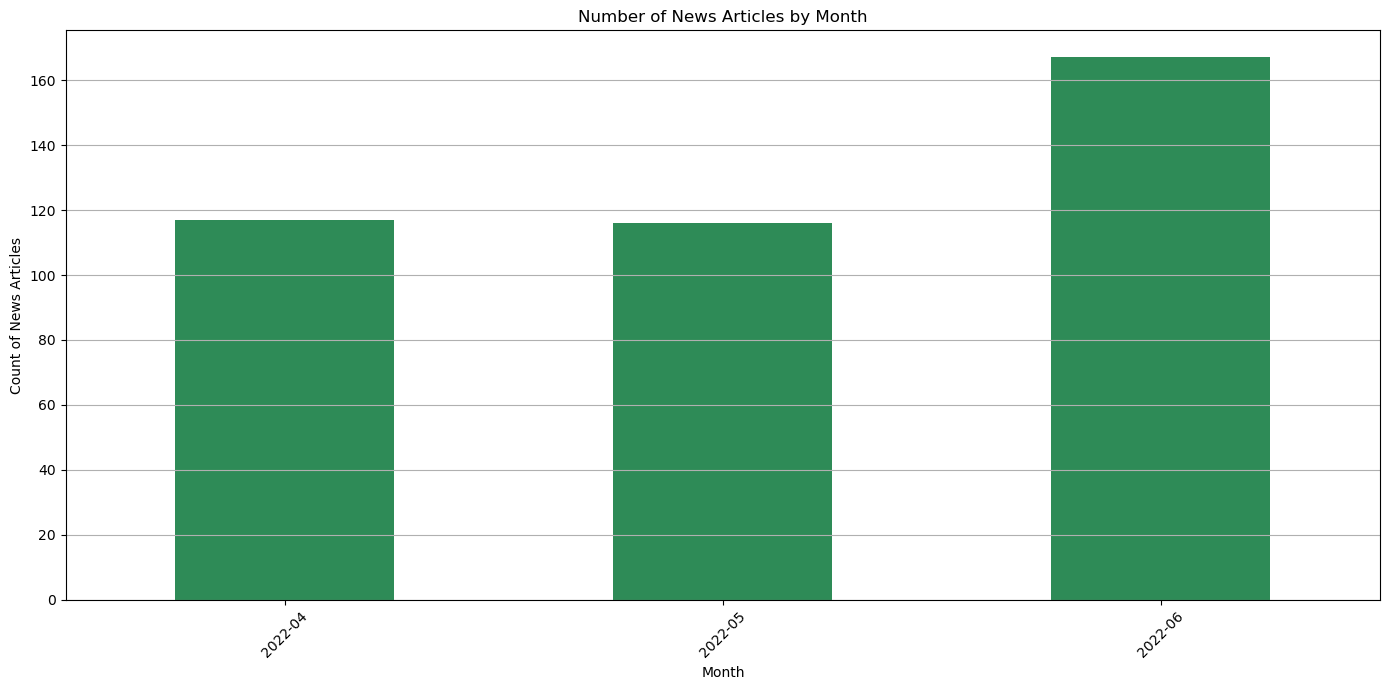

In [17]:
plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='bar', color='seagreen')
plt.title('Number of News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

- In this barchart, we can see that, in April and May months, the total number of publications is practically the same but, in June, the total number of publications increased rapidly.

Now, lets see what languages our dataset has by using the _DetectorFactory_ python library.

In [18]:
# Join the 'Headline', 'Synopsis' and 'Full_text' columns into a single column ('Complete_text')
df['Complete_text'] =  df['Headline'] + ' ' + df['Synopsis'] + ' ' + df['Full_text']
df.reset_index(drop=True, inplace=True)

corpus = []
for i in range(0, df['Complete_text'].size):
    corpus.append(df['Complete_text'][i])

print(corpus)

['Banks holding on to subsidy share, say payments firms The companies have written to the National Payments Corp. of India (NPCI), complaining that a,1700 crore of the a,11,500 crore granted in the budget is being retained by banks. ReutersPayments companies and banks are at loggerheads over the sharing of government-granted subsidies for building payment infrastructure, said three people with knowledge of the matter. \r\n\r\nThe companies have written to the National Payments Corp. of India (NPCI), complaining that a,1700 crore of the a,11,500 crore granted in the budget is being retained by banks, they said. This has deprived companies connecting up the last mile of state-promised revenues, according to them. The government granted the subsidies in exchange for waiving Merchant Discount Rate (MDR) charges.\r\n\r\n"The government has released a,1700 crore worth of subsidies to banks but they are not sharing it with any payment aggregators," said the CEO of a payments company on condit

In [19]:
from langdetect import detect, DetectorFactory
from langcodes import Language

DetectorFactory.seed = 0   # To get consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Function to convert ISO 639-1 codes to full language names
def get_full_language_name(iso_code):
    try:
        return str(Language.get(iso_code).display_name())
    except:
        return None    

df['language'] = df['Complete_text'].apply(detect_language)   # Apply language detection
df['language'] = df['language'].apply(get_full_language_name)    # Convert the languages code to the correspondant full extended language name (e.g., pt -> portuguese)

language_counts = df['language'].value_counts()
print(language_counts)

English    400
Name: language, dtype: int64


In [20]:
import plotly.express as px

status_counts = df['language'].value_counts()
status_counts_df = pd.DataFrame(status_counts).reset_index()

fig = px.pie(status_counts_df, values='language', names='index', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As we can see, all news are in _English_, so there is no need to apply translation in the dataset.

#### Removing stop words

In [21]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedromacedo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# list of negative words to be removed from the set stop words, since they may convey sentiment

negative_words = {
    "no",
    "not",
    "none",
    "neither",
    "never",
    "nobody",
    "nothing",
    "nowhere",
    "doesn't",
    "isn't",
    "wasn't",
    "shouldn't",
    "won't",
    "can't",
    "couldn't",
    "don't",
    "haven't",
    "hasn't",
    "hadn't",
    "aren't",
    "weren't",
    "wouldn't",
    "daren't",
    "needn't",
    "didn't",
    "without",
    "against",
    "negative",
    "deny",
    "reject",
    "refuse",
    "decline",
    "unhappy",
    "sad",
    "miserable",
    "hopeless",
    "worthless",
    "useless",
    "futile",
    "disagree",
    "oppose",
    "contrary",
    "contradict",
    "disapprove",
    "dissatisfied",
    "objection",
    "unsatisfactory",
    "unpleasant",
    "regret",
    "resent",
    "lament",
    "mourn",
    "grieve",
    "bemoan",
    "despise",
    "loathe",
    "detract",
    "abhor",
    "dread",
    "fear",
    "worry",
    "anxiety",
    "sorrow",
    "gloom",
    "melancholy",
    "dismay",
    "disheartened",
    "despair",
    "dislike",
    "aversion",
    "antipathy",
    "hate",
    "disdain",
}
sw = set(stopwords.words("english"))
stop_words = sw - negative_words

Using this stop word list (which does include words that perhaps we should *not* remove, such as negation terms), we can considerably reduce the size of our corpus.

In [23]:
# your code here

vocab = set()

for sent in corpus:
    vocab.update(sent.split())

# Store the intial size of the corpus before removing the stop words
corpus_bf_stop_words_count = len(vocab)

print('len(corpus before stop words removal) = ', corpus_bf_stop_words_count)

corpus = [' '.join([word for word in sent.split() if word not in stopwords.words('english')]) for sent in corpus]
print('-------')
print('len(new_corpus) = ', len(corpus))
corpus

len(corpus before stop words removal) =  20667
-------
len(new_corpus) =  400


['Banks holding subsidy share, say payments firms The companies written National Payments Corp. India (NPCI), complaining a,1700 crore a,11,500 crore granted budget retained banks. ReutersPayments companies banks loggerheads sharing government-granted subsidies building payment infrastructure, said three people knowledge matter. The companies written National Payments Corp. India (NPCI), complaining a,1700 crore a,11,500 crore granted budget retained banks, said. This deprived companies connecting last mile state-promised revenues, according them. The government granted subsidies exchange waiving Merchant Discount Rate (MDR) charges. "The government released a,1700 crore worth subsidies banks sharing payment aggregators," said CEO payments company condition anonymity. Compensation MDR Waiver "We taken matter NPCI, nodal agency feedback got take matter respective banks, responding." Last year, finance minister Nirmala Sitharaman announced Rs 1,500 crore fund hasten expansion India\'s di

### Wordclouds

Now, lets see what are the most common words in the dataset. First, lets join the columns **Headline**, **Synopsis** and **Full Text**.

In [24]:
df_wc = df.copy()
df_wc['Complete_text'] =  df_wc['Headline'] + ' ' + df_wc['Synopsis'] + ' ' + df_wc['Full_text']   # Concatenate the text columns
df_wc.drop(columns=['Headline', 'Synopsis', 'Full_text'], inplace=True)   # Drop the original text columns

Compute the result dataset.

In [25]:
df_wc.head()

Date_published Final Status  \
0     2022-06-21     negative   
1     2022-04-19     positive   
2     2022-05-27     positive   
3     2022-04-06     negative   
4     2022-06-14     positive   

                                       Complete_text language  
0  Banks holding on to subsidy share, say payment...  English  
1  Digitally ready Bank of Baroda aims to click o...  English  
2  Karnataka attracted investment commitment of R...  English  
3  Splitting of provident fund accounts may be de...  English  
4  Irdai weighs proposal to privatise Insurance I...  English

Now, lets compute the most used words in general.

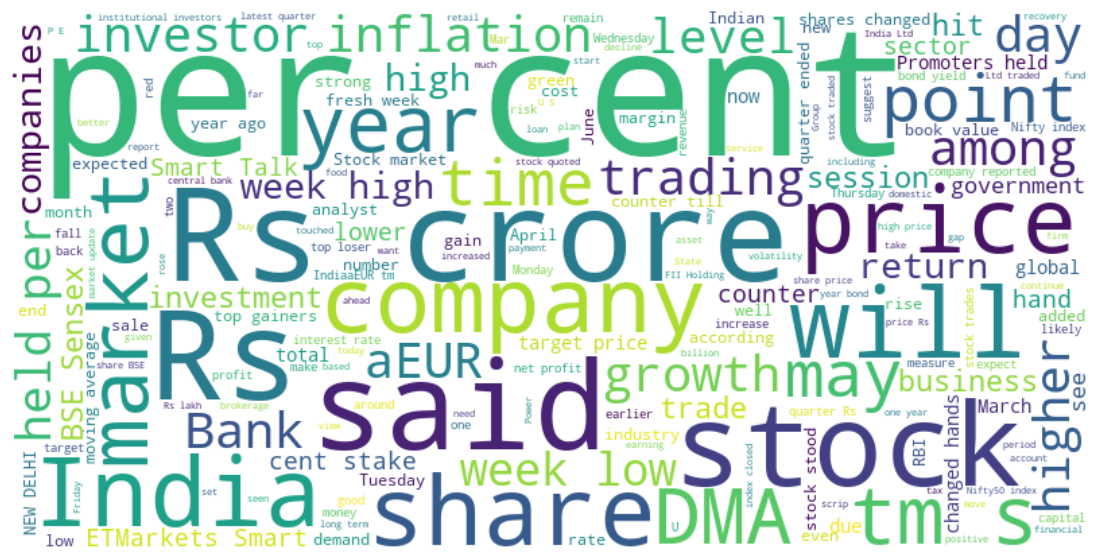

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white'
).generate(" ".join(df_wc['Complete_text'].dropna().values))

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

Following this, lets compute the words most used in each class (_Positive_ and _Negative_) of the **Final Status** column.

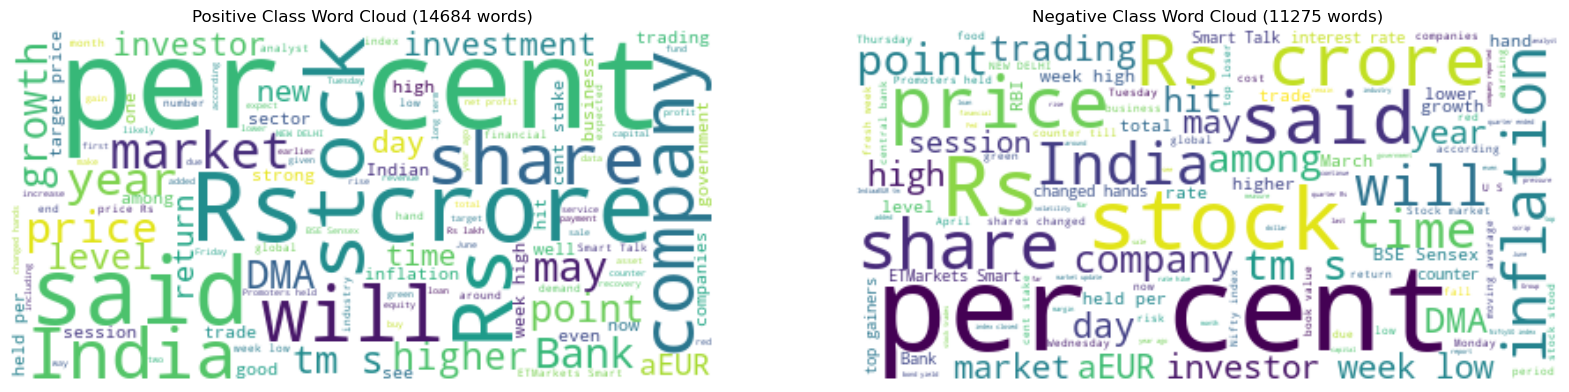

In [27]:
def generate_wordcloud(corpus):
    wordcloud = WordCloud(
        width=400, height=200,
        background_color='white'
    ).generate(corpus)
    return wordcloud

# Generate word clouds for positive and negative classes
positive_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'positive']['Complete_text'].dropna().values)
negative_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'negative']['Complete_text'].dropna().values)

# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

As we can see, we notice some words are unecessary. Like, for example, the words _per cent_ and _India_ in the negative class. Lets remove the common words from both classes. 

In [28]:
import string

# Pattern that matches punctuation except periods within numbers
pattern = r'(?<!\d)[.,;:!?"\'`-](?!\d)'

# Remove punctuation from positive_words and negative_words arrays
positive_words = {re.sub(pattern, '', word).strip() for word in positive_words}
negative_words = {re.sub(pattern, '', word).strip() for word in negative_words}

# Find common words between the two sets
common_words = positive_words.intersection(negative_words)
print(common_words)

# # Remove common words from each corpus
# positive_corpus_str = " ".join([word for word in positive_corpus_str.split() if word not in common_words])
# negative_corpus_str = " ".join([word for word in negative_corpus_str.split() if word not in common_words])

# corpus_str = " ".join(word for word in corpus if word not in common_words)

{'', '3.86%)', 'starting', '6.04', 'MF', 'compliance', '0.84%)', 'Chemicals(up', 'Given', 'effect', 'mark', 'fullyear', '45', 'either', 'dated', 'decent', 'new', 'Laboratories(up', 'cancellation', 'test', '2.0', 'stance', 'whatever', 'peers', 'Ajay', 'Ratings', '11%', 'Regulatory', '54.9', 'added', 'Nestle', 'decision', 'a', 'crore', 'Punjab', 'Hotels', '2.13%)', 'GHCL', 'rains', 'engineering', 'marginal', 'avoid', '10:34AM(IST)', '121.0', 'transition', 'NSEBSEOne97', 'sleeping', 'earn', 'executives', 'Minds', 'realisations', '0.53%)', 'Fertilizers(down', 'Tesla', 'cases', 'mode', 'assistance', 'undertone', 'hasnt', 'changing', 'Our', 'curbs', 'as', 'timing', 'reductions', 'factories', 'economy', 'Grasim', 'research', 'only', '10:04AM', 'Check', '15,900', 'Baroda', 'Innov(PP)and', 'under', 'vice', '1.19', '12', 'cycles', 'standalone', 'After', 'Institutional', 'cover', 'signalled', 'our', 'Dinesh', '0.42%)', 'current', 'gradually', 'Peter', 'Strength', 'There', 'fetched', 'correspondin

Lets check if all the comman words were removed from the corpus.

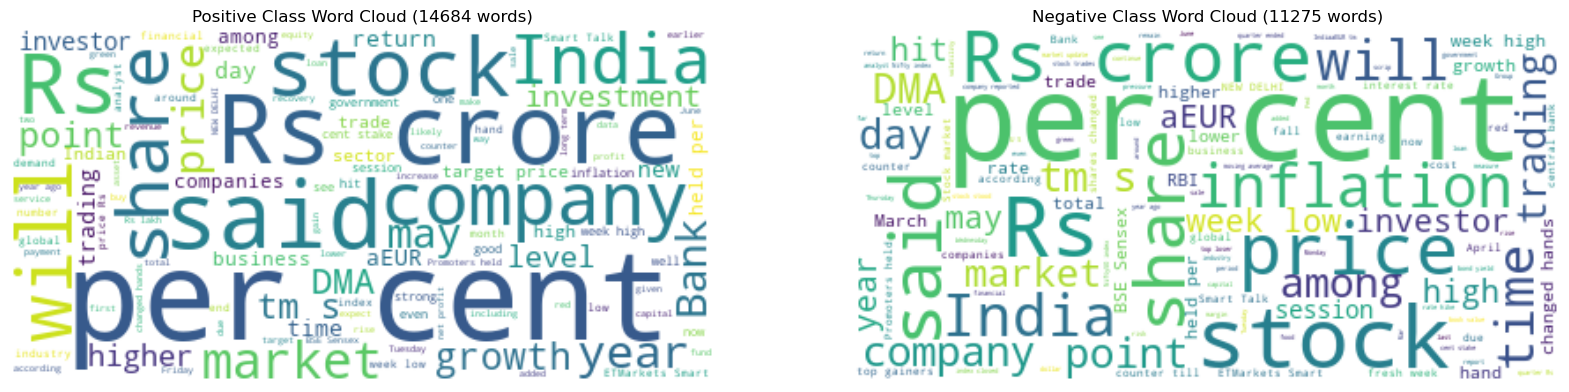

In [29]:
# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

## TF-IDF

We can adjust the counts of each word in a document by considering how many times it occurs in the document (its *term frequency TF*) and in how many documents it occurs (its *document frequency DF*). [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) provides a way to directly obtain TF-IDF weighted features: the term frequency of a word is multiplied by its *inverse* document frequency.

Can you try it out? Compare the previous representation vector of the 124th review with its TF-IDF representation vector.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(corpus)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus) # Each row corresponds to a document, and the colums represent the words in the vocabulary (in this case, the corpus). Each cell represents the TF-IDF score for a specific word in a specific document.
feature_names = tfidf_vectorizer.get_feature_names_out()
print(X_tfidf.shape)

['Banks holding subsidy share, say payments firms The companies written National Payments Corp. India (NPCI), complaining a,1700 crore a,11,500 crore granted budget retained banks. ReutersPayments companies banks loggerheads sharing government-granted subsidies building payment infrastructure, said three people knowledge matter. The companies written National Payments Corp. India (NPCI), complaining a,1700 crore a,11,500 crore granted budget retained banks, said. This deprived companies connecting last mile state-promised revenues, according them. The government granted subsidies exchange waiving Merchant Discount Rate (MDR) charges. "The government released a,1700 crore worth subsidies banks sharing payment aggregators," said CEO payments company condition anonymity. Compensation MDR Waiver "We taken matter NPCI, nodal agency feedback got take matter respective banks, responding." Last year, finance minister Nirmala Sitharaman announced Rs 1,500 crore fund hasten expansion India\'s di

In [58]:
import numpy as np

# Number of documents
num_documents = X_tfidf.shape[0]

# Summing the TF-IDF scores for each word across all documents
X_tfidf_sums = X_tfidf.sum(axis=0)

# Calculating the mean average TF-IDF score for each word
X_tfidf_means = X_tfidf_sums / num_documents

mean_tfidf_scores = np.mean(X_tfidf.toarray(), axis=0)

# Creating a dictionary to map words to their mean average TF-IDF score
X_tfidf_means_dict = {
    word: X_tfidf_means[0, idx]
    for word, idx in zip(
        tfidf_vectorizer.get_feature_names_out(),
        range(len(tfidf_vectorizer.get_feature_names_out()))
    )
}

for word, score in X_tfidf_means_dict.items():
    print(f"{word}: {score}")

00: 0.0022227490197759187
000: 0.006552258180034821
000prices: 0.00018021940703553951
000the: 0.00018021940703553951
001: 0.0003533682416502088
0028: 0.0001487137061487138
006: 0.0001292816393444144
009: 0.000255867911441775
00am: 0.0015414139549639358
00pm: 0.0007783558568264487
01: 0.012575769637660163
0117: 0.0001279339557208875
013: 0.0006265576418024051
015: 0.00045934428769646305
016: 0.00029568676747348616
01am: 0.0002364982955199715
02: 0.006705559553586418
020: 0.0002594519522754829
023: 0.00035491838213251727
024: 0.00015018141363564946
02pm: 0.001957069350757578
03: 0.007037606562859377
032: 0.000100844789966152
035: 9.03221816165857e-05
03pm: 0.0016081817072630192
04: 0.008824568913024048
040: 0.0001778461082430194
042: 0.00013130674257698068
045: 0.00010963845173825586
049: 0.0002375316191958043
04am: 0.0010755214482574616
04pm: 0.0008833993749426388
05: 0.010470707381515424
050: 0.0003575934607465778
055: 0.00011895321793389556
057: 0.00014932784889533918
05am: 0.00179979

Lets check the top10 words with the highest TF-IDF score.

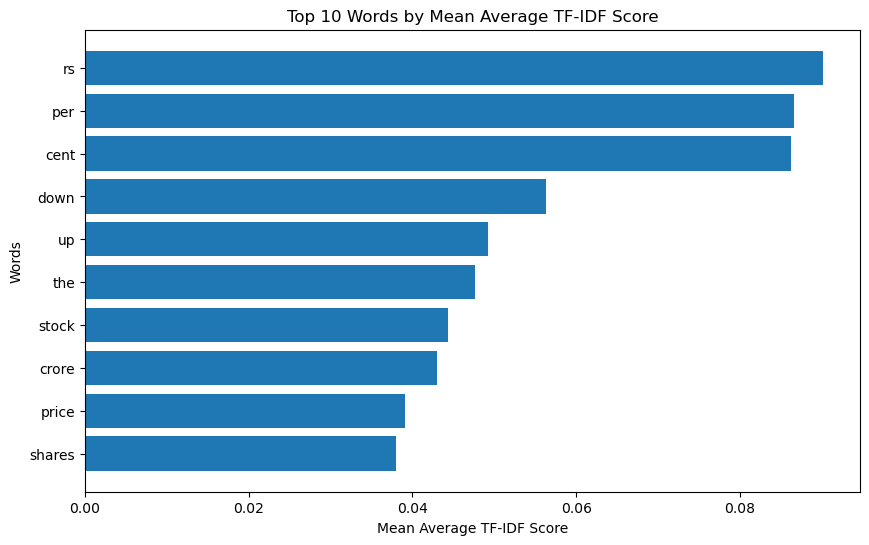

In [60]:
sorted_indices = np.argsort(mean_tfidf_scores)[::-1]
sorted_words = [feature_names[i] for i in sorted_indices]

top_n = 10
top_words = sorted_words[:top_n]
top_scores = mean_tfidf_scores[sorted_indices][:top_n]

plt.figure(figsize=(10,6))
plt.barh(top_words, top_scores)
plt.xlabel('Mean Average TF-IDF Score')
plt.ylabel('Words')
plt.title('Top {} Words by Mean Average TF-IDF Score'.format(top_n))
plt.gca().invert_yaxis()
plt.show()

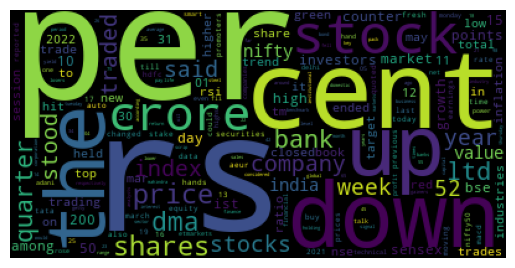

In [62]:
X_tfidf_sums = X_tfidf.mean(axis=0) # Sum the tf-idf scores across all documents

X_tfidf_sums_dict = {
    word: X_tfidf_sums[0, idx]
    for word, idx in zip(
        tfidf_vectorizer.get_feature_names_out(),
        range(len(tfidf_vectorizer.get_feature_names_out()))
    )
}

wordcloud_tfidf = WordCloud().generate_from_frequencies(X_tfidf_sums_dict)

plt.figure()
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.show()

### Name Entity Recognition (NER)

In [34]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

def extract_entities(text, entity_types=None):
    # This function now just extracts entities and doesn't do visualization
    doc = nlp(text)
    if entity_types:
        return [(ent, ent.label_) for ent in doc.ents if ent.label_ in entity_types]
    else:
        return [(ent, ent.label_) for ent in doc.ents]

entity_frequencies = Counter()

for text in df['Complete_text']:
    entities = extract_entities(text)
    entity_frequencies.update([(entity[0].text, entity[1]) for entity in entities])

Lets see the 10 most occurent entities in the dataset.

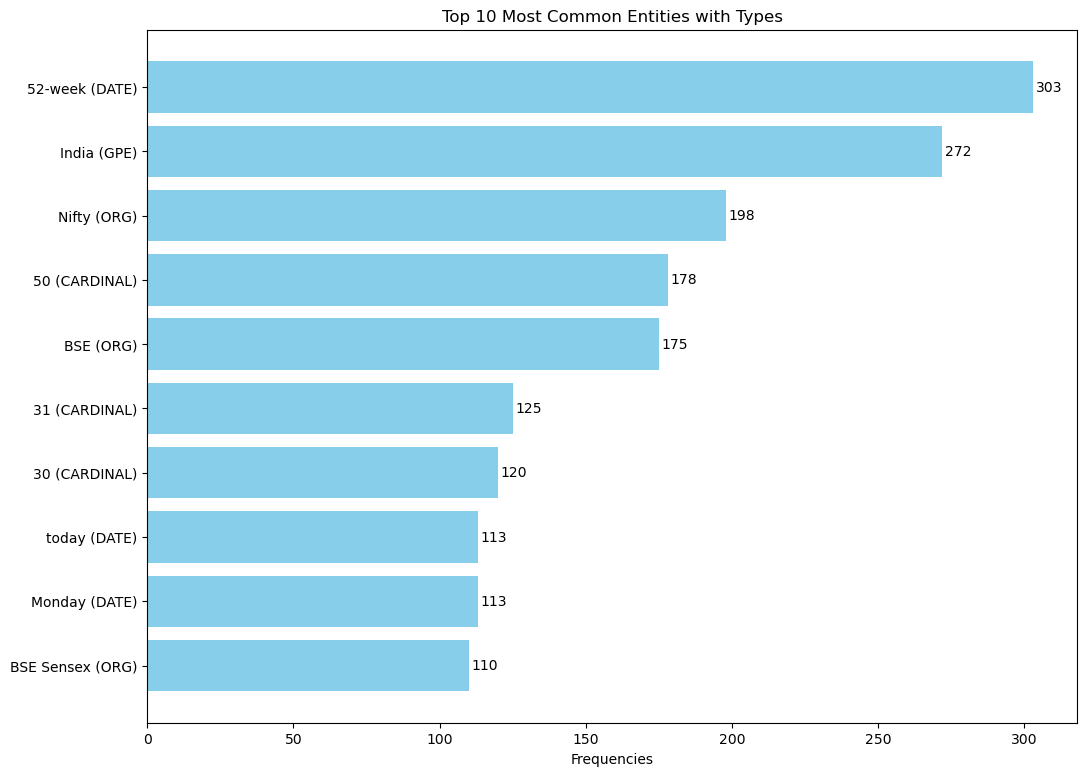

In [35]:
# Get the most common entities and their types
top_entities_with_types = entity_frequencies.most_common(10)

# Separate the entity names and their types for the visualization
entities_with_types = [f"{ent[0][0]} ({ent[0][1]})" for ent in top_entities_with_types]
frequencies = [ent[1] for ent in top_entities_with_types]

# Create the bar chart with entity types included
plt.figure(figsize=(12, 9))
bars = plt.barh(entities_with_types, frequencies, color='skyblue') # Create horizontal bar chart

# Add the frequency numbers in front of the bars
for bar in bars:
    plt.text(
        bar.get_width() + 1.0,       # x-coordinate position of text
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position of text
        str(int(bar.get_width())), # bar width used as text
        va='center'  # vertical alignment is center
    )

# Add labels and title
plt.xlabel('Frequencies')
plt.title('Top 10 Most Common Entities with Types')
plt.gca().invert_yaxis() # Invert the y-axis to have the highest frequency at the top
plt.show()

Lets check how much types the dataset has, and how many entities each type has.

In [37]:
from collections import defaultdict

# Initialize a dictionary to count unique entities for each type
unique_entity_counts = defaultdict(set)

# Populate the dictionary
for (entity_text, entity_type), count in entity_frequencies.items():
    unique_entity_counts[entity_type].add(entity_text)

# Convert sets to their sizes to get the number of unique entities per type
unique_entity_counts = {type: len(entities) for type, entities in unique_entity_counts.items()}

# The total number of types is simply the number of keys in the unique_entity_counts dictionary
total_types = len(unique_entity_counts)

print(f"Total number of types: {total_types}")
print(f"Counts for each type: {unique_entity_counts}")

Total number of types: 17
Counts for each type: {'ORG': 2235, 'CARDINAL': 1532, 'DATE': 925, 'PERSON': 915, 'PRODUCT': 950, 'GPE': 284, 'FAC': 32, 'PERCENT': 838, 'LAW': 76, 'ORDINAL': 17, 'QUANTITY': 19, 'WORK_OF_ART': 33, 'NORP': 67, 'LOC': 32, 'MONEY': 922, 'EVENT': 7, 'TIME': 43}


As we can see, there are 17 different types of entities in the dataset.

Lets list the number of records in each entity type.

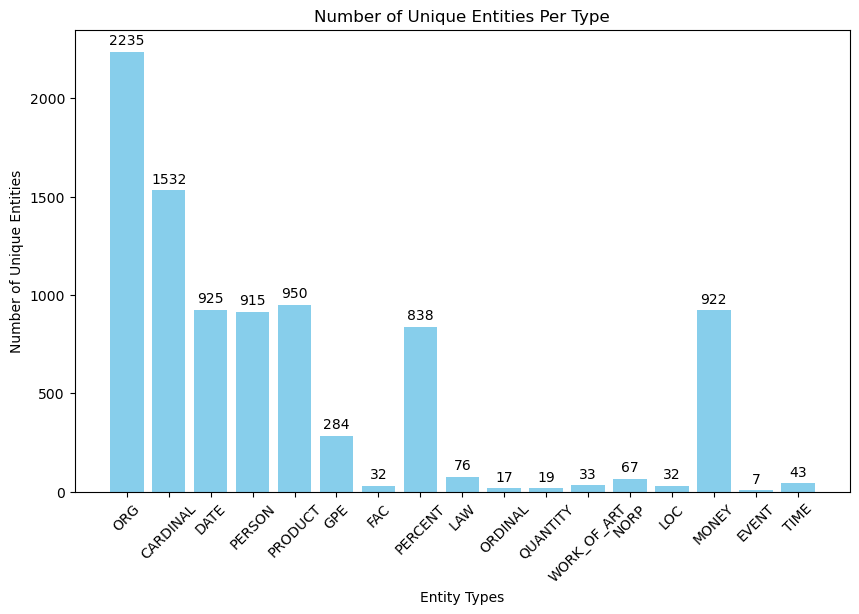

In [39]:
entity_types = list(unique_entity_counts.keys())
entity_counts = list(unique_entity_counts.values())

plt.figure(figsize=(10, 6))

bars = plt.bar(entity_types, entity_counts, color='skyblue')

# Add the number of unique entities on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom')

plt.xlabel('Entity Types')
plt.ylabel('Number of Unique Entities')
plt.title('Number of Unique Entities Per Type')
plt.xticks(rotation=45)
plt.show()

As we can see, the most used entity types are **organizations (ORG)**, **product (PRODUCT)**, **dates (DATE)**, **money (MONEY)** and **persons (PERSON)**.

In [40]:
# Initialize a dict to store counters for each entity type
entity_texts_by_type = defaultdict(Counter)

for doc in nlp.pipe(df['Complete_text']):
    for ent in doc.ents:
        # Update the counter for this entity type with this specific entity text
        entity_texts_by_type[ent.label_][ent.text] += 1

# Now find the most common text for each entity type
most_common_texts_by_type = {entity_type: texts.most_common(1)[0] for entity_type, texts in entity_texts_by_type.items()}

data = [{'Entity Type': entity_type, 'Most Common Text': text, 'Count': count} 
        for entity_type, (text, count) in most_common_texts_by_type.items()]

# Create a DataFrame
df_most_common = pd.DataFrame(data)

# Display the DataFrame
print(df_most_common)

    Entity Type    Most Common Text  Count
0           ORG               Nifty    198
1      CARDINAL                  50    178
2          DATE             52-week    303
3        PERSON       Piyush Sharma     31
4       PRODUCT                  Q4     15
5           GPE               India    272
6           FAC        Dalal Street     15
7       PERCENT                 10%     16
8           LAW                 RoE      8
9       ORDINAL               first     37
10     QUANTITY   8.1 bps overnight      2
11  WORK_OF_ART                 RoE     10
12         NORP              Indian     88
13          LOC                Asia     19
14        MONEY          5 per cent     21
15        EVENT     the Ukraine war      4
16         TIME  Earlier in the day     19


In the above table, we can see the most common used entity for each entity type and how many times it was used.

Now, lets make NER for each individual class in the dataset.

In [41]:
groups = df.groupby('Final Status')

In [46]:
from collections import defaultdict

class_based_entities = {}

for class_label, group in groups:
    entity_texts_by_type = defaultdict(Counter)
    
    # Perform NER on each text in the current group
    for doc in nlp.pipe(group['Complete_text']):
        for ent in doc.ents:
            # Update the counter for this entity type with this specific entity text
            entity_texts_by_type[ent.label_][ent.text] += 1
    
    # Find the most common text for each entity type within this class
    most_common_texts_by_type = {entity_type: texts.most_common(1)[0] for entity_type, texts in entity_texts_by_type.items()}
    
    # Store results for this class
    class_based_entities[class_label] = most_common_texts_by_type


In [47]:
# Convert the accumulated results into a structured format for display or further analysis
data = []
for class_label, entities_info in class_based_entities.items():
    for entity_type, (text, count) in entities_info.items():
        data.append({
            'Class': class_label,
            'Entity Type': entity_type,
            'Most Common Text': text,
            'Count': count
        })

In [48]:
# Create a DataFrame to display the results
df_class_based_entities = pd.DataFrame(data)

# Display the DataFrame
print(df_class_based_entities)

       Class  Entity Type           Most Common Text  Count
0   negative          ORG                      Nifty    104
1   negative     CARDINAL                         50     90
2   negative         DATE                    52-week    167
3   negative       PERSON              Piyush Sharma     17
4   negative      PRODUCT                         Q4      7
5   negative          GPE                      India     90
6   negative          FAC               Dalal Street      6
7   negative      PERCENT                         6%     10
8   negative          LOC                       Gulf     16
9   negative        EVENT                      Kospi      2
10  negative         TIME         Earlier in the day     11
11  negative         NORP                      Asian     35
12  negative     QUANTITY          8.1 bps overnight      2
13  negative      ORDINAL                     second     17
14  negative        MONEY               0.0 per cent     10
15  negative  WORK_OF_ART               

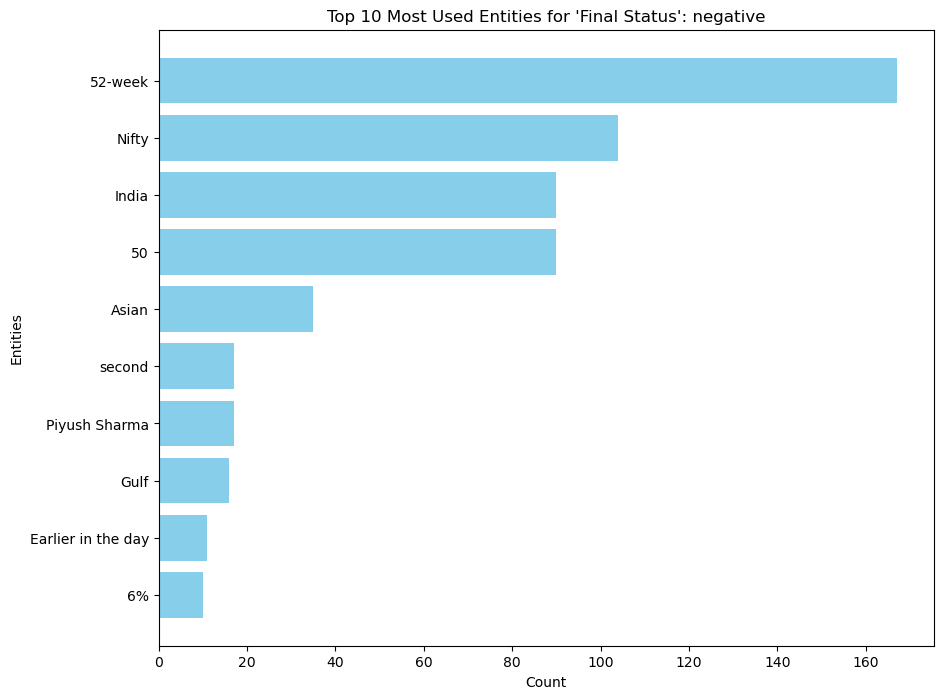

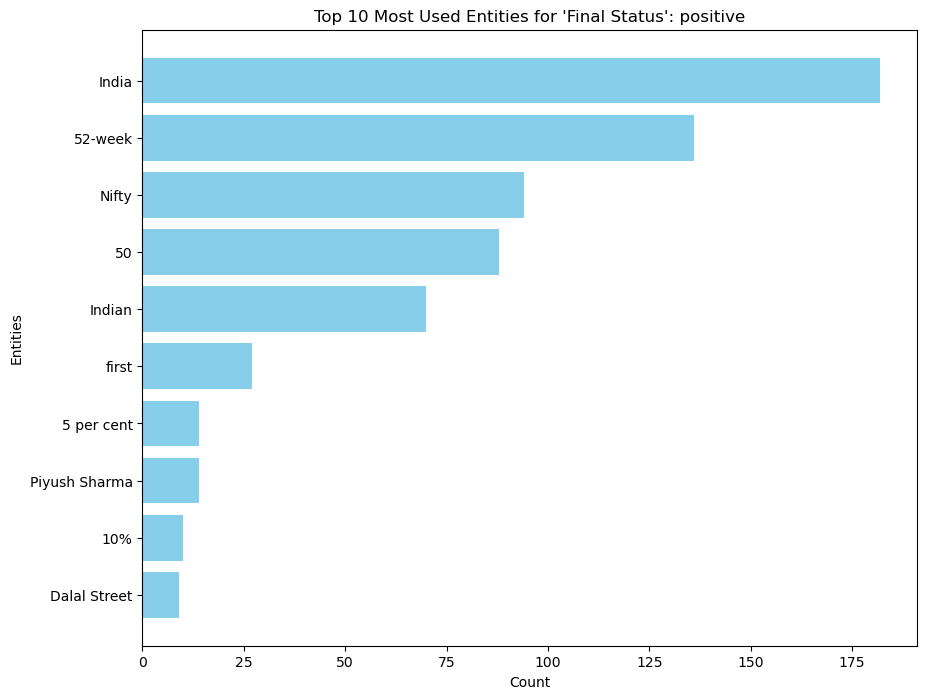

In [51]:
top_entities_per_class = df_class_based_entities.groupby('Class')\
    .apply(lambda x: x.nlargest(10, 'Count'))\
    .reset_index(drop=True)


# Unique classes in your dataset
classes = top_entities_per_class['Class'].unique()

for class_name in classes:
    # Filter the top entities for the current class
    data = top_entities_per_class[top_entities_per_class['Class'] == class_name]
    
    # Sort data for better visualization
    data = data.sort_values(by='Count', ascending=True)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(data['Most Common Text'], data['Count'], color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Entities')
    plt.title(f'Top 10 Most Used Entities for \'Final Status\': {class_name}')
    plt.show()